# 1) Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import joblib

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
warnings.filterwarnings('ignore')

# 2) Loading and Exploring Dataset

1) reading data

In [2]:
path = 'creditcard.csv'
data = pd.read_csv(path)

2) dataset exploration

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data .tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
pd.options.display.max_columns = None

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
print(f'Number of rows: {data.shape[0]}')
print(f'Number of columns: {data.shape[1]}')

Number of rows: 284807
Number of columns: 31


3) data cleaning

In [10]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


We have no nulls in the dataset

In [11]:
data.duplicated().value_counts()

,count
False,283726
True,1081


In [12]:
data.drop_duplicates(inplace=True)

data.duplicated().value_counts()

,count
False,283726


4) data visualization

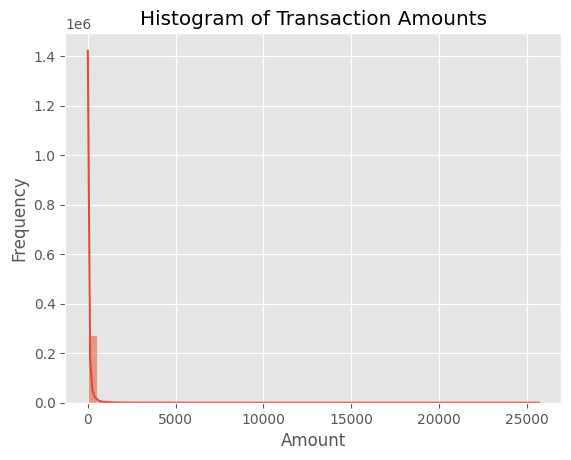

In [13]:
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

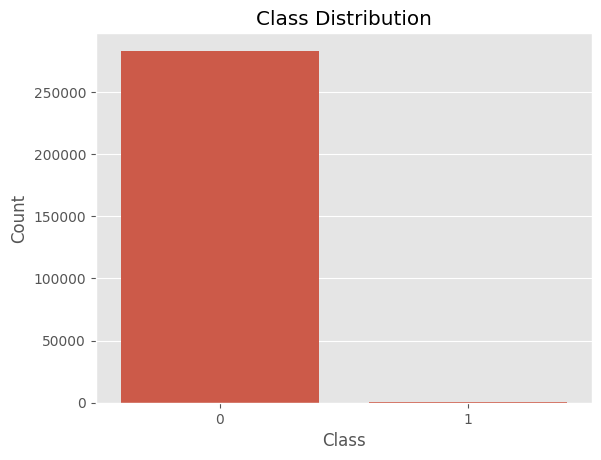

In [14]:
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

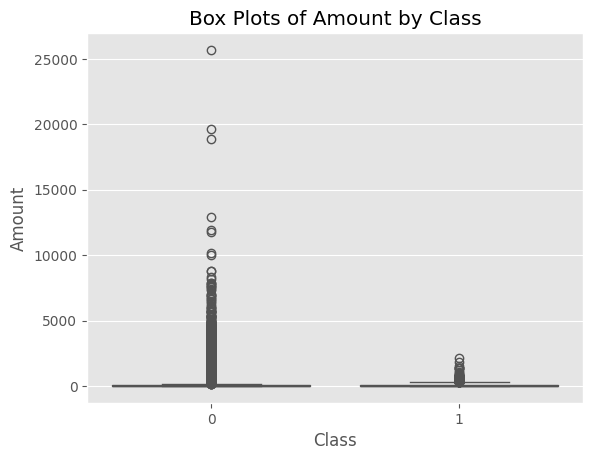

In [15]:
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Box Plots of Amount by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

5) class imbalance

In [16]:
fraud_count = data['Class'].value_counts()[1]
non_fraud_count = data['Class'].value_counts()[0]

print("Number of fraudulent transactions:", fraud_count)
print("Number of non-fraudulent transactions:", non_fraud_count)

Number of fraudulent transactions: 473
Number of non-fraudulent transactions: 283253


In [17]:
imbalance_ratio = non_fraud_count / fraud_count
print("Class imbalance ratio:", imbalance_ratio)

Class imbalance ratio: 598.8435517970402


# 3) Feature Engineering

1) feature scaling

<Axes: ylabel='Density'>

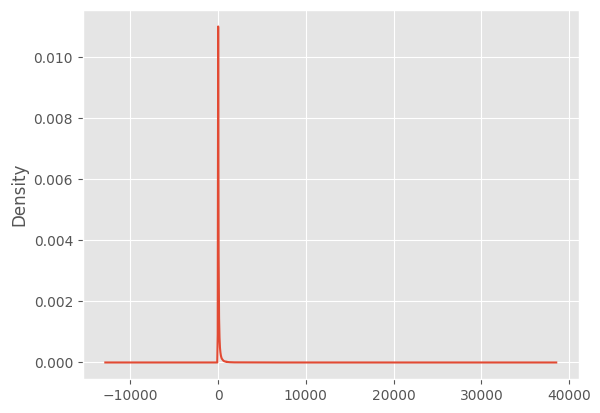

In [18]:
data['Amount'].plot.kde()

In [19]:
Scaler = StandardScaler()
data['Amount'] = Scaler.fit_transform(pd.DataFrame(data['Amount']))

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [20]:
data.drop('Time', axis=1, inplace=True)

# 4) Splitting Data

In [21]:
X = data.drop('Class', axis=1)
y = data['Class']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(226980, 29)
(56746, 29)
(226980,)
(56746,)


# 5) Model Selection

In [23]:
Classifier = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, clf in Classifier.items() :
  print (f'============= {name} ==================')
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(f'Accuracy = {accuracy_score(y_test, y_pred)}\n')
  print(f'precision_score = {precision_score(y_test, y_pred)}\n')
  print(f'recall_score = {recall_score(y_test, y_pred)}\n')
  print(f'f1_score = {f1_score(y_test, y_pred)}\n')
  print(f'confusion_matrix = {confusion_matrix(y_test, y_pred)}\n')

============= Logistic Regression ==================
Accuracy = 0.9991541254009093

precision_score = 0.875

recall_score = 0.5444444444444444

f1_score = 0.6712328767123288

confusion_matrix = [[56649     7]
 [   41    49]]

============= Decision Tree ==================
Accuracy = 0.9991541254009093

precision_score = 0.7441860465116279

recall_score = 0.7111111111111111

f1_score = 0.7272727272727273

confusion_matrix = [[56634    22]
 [   26    64]]

============= Random Forest ==================
Accuracy = 0.9995594403129736

precision_score = 0.9710144927536232

recall_score = 0.7444444444444445

f1_score = 0.8427672955974843

confusion_matrix = [[56654     2]
 [   23    67]]



due to imbalance in data, results are not that good

# 6) Handling Data Imbalance

([<matplotlib.patches.Wedge at 0x7eb1e48e9870>,
 [Text(-1.0999849139505065, 0.005760996554156921, 'Legit'),
  Text(1.099984914296047, -0.005760930577456522, 'Fraud')])

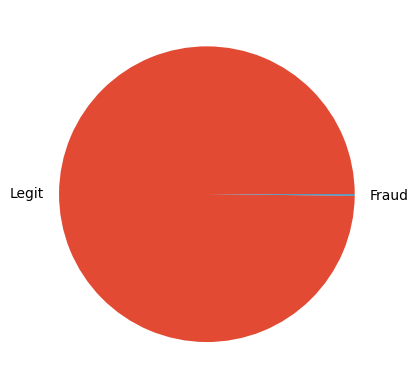

In [24]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

plt.pie(data['Class'].value_counts(), labels=['Legit', 'Fraud'])

In [25]:
print(f'Legit >> {legit.shape}')
print(f'Fraud >> {fraud.shape}')

Legit >> (283253, 30)
Fraud >> (473, 30)


1) undersampling majority class

In [26]:
new_data = pd.concat([legit.sample(n=473), fraud], ignore_index = True)

In [27]:
new_data['Class'].value_counts()

,count
Class,
0,473
1,473


spliting data again depond on new version of data

In [28]:
X_undersample = new_data.drop('Class', axis=1)
y_undersample = new_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size=0.2, random_state=42, shuffle=True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(756, 29)
(190, 29)
(756,)
(190,)


In [29]:
Classifier = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, clf in Classifier.items() :
  print (f'============= {name} ==================')
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(f'Accuracy = {accuracy_score(y_test, y_pred)}\n')
  print(f'precision_score = {precision_score(y_test, y_pred)}\n')
  print(f'recall_score = {recall_score(y_test, y_pred)}\n')
  print(f'f1_score = {f1_score(y_test, y_pred)}\n')
  print(f'confusion_matrix = {confusion_matrix(y_test, y_pred)}\n')

============= Logistic Regression ==================
Accuracy = 0.9578947368421052

precision_score = 1.0

recall_score = 0.9215686274509803

f1_score = 0.9591836734693877

confusion_matrix = [[88  0]
 [ 8 94]]

============= Decision Tree ==================
Accuracy = 0.9105263157894737

precision_score = 0.9292929292929293

recall_score = 0.9019607843137255

f1_score = 0.9154228855721394

confusion_matrix = [[81  7]
 [10 92]]

============= Random Forest ==================
Accuracy = 0.9263157894736842

precision_score = 0.9680851063829787

recall_score = 0.8921568627450981

f1_score = 0.9285714285714286

confusion_matrix = [[85  3]
 [11 91]]



2) oversampling majority class

In [30]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [31]:
y_sm.value_counts()

,count
Class,
0,283253
1,283253


splitting data with update

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42, shuffle=True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(453204, 29)
(113302, 29)
(453204,)
(113302,)


choose model with update

In [33]:
Classifier = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, clf in Classifier.items() :
  print (f'============= {name} ==================')
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(f'Accuracy = {accuracy_score(y_test, y_pred)}\n')
  print(f'precision_score = {precision_score(y_test, y_pred)}\n')
  print(f'recall_score = {recall_score(y_test, y_pred)}\n')
  print(f'f1_score = {f1_score(y_test, y_pred)}\n')
  print(f'confusion_matrix = {confusion_matrix(y_test, y_pred)}\n')

============= Logistic Regression ==================
Accuracy = 0.9453319447141268

precision_score = 0.9724964081129999

recall_score = 0.9169584264325551

f1_score = 0.9439111851637206

confusion_matrix = [[54989  1474]
 [ 4720 52119]]

============= Decision Tree ==================
Accuracy = 0.9982789359411132

precision_score = 0.9976454877705931

recall_score = 0.9989267932229631

f1_score = 0.9982857293562254

confusion_matrix = [[56329   134]
 [   61 56778]]

============= Random Forest ==================
Accuracy = 0.999894088365607

precision_score = 0.9997889219186997

recall_score = 1.0

f1_score = 0.9998944498196851

confusion_matrix = [[56451    12]
 [    0 56839]]



The Random Forest model is the best in terms of performance:

It has the highest accuracy (99.99%).

Perfect recall (1.0) meaning no true positives are missed.

Precision and F1-score are also nearly perfect.

# 7) Deploying model

In [34]:
RandomForestModel = RandomForestClassifier()
RandomForestModel.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
joblib.dump(RandomForestModel, 'CerditCardRandomForestModel.pkl')

['CerditCardRandomForestModel.pkl']

In [36]:
print (list(data.iloc[540]))

[-0.960818700152674, 0.0710130174771463, 2.60281933663759, -0.99869306098515, -0.383880011575843, -0.208286115073412, 0.368938158535082, 0.0595136407483677, 0.504836275517028, -0.678021319743396, 1.05047512024654, 1.31612484967149, 0.377964606253002, -0.861676968779237, -1.75580529833207, 0.097838076187801, -0.4651699009842, -0.224919085009194, -0.0197062093199049, 0.315315447416209, -0.13682682244554, -0.0813335069826737, -0.016162266594744, 0.605342437117432, -0.12175945402901, 0.736684428025349, 0.0771085656054282, -0.069752043247462, -0.12932434973089274, 0.0]


In [38]:
FinalModel = joblib.load('CerditCardRandomForestModel.pkl')

Modelpredtest = FinalModel.predict([[-0.960818700152674, 0.0710130174771463, 2.60281933663759, -0.99869306098515, -0.383880011575843, -0.208286115073412, 0.368938158535082, 0.0595136407483677, 0.504836275517028, -0.678021319743396, 1.05047512024654, 1.31612484967149, 0.377964606253002, -0.861676968779237, -1.75580529833207, 0.097838076187801, -0.4651699009842, -0.224919085009194, -0.0197062093199049, 0.315315447416209, -0.13682682244554, -0.0813335069826737, -0.016162266594744, 0.605342437117432, -0.12175945402901, 0.736684428025349, 0.0771085656054282, -0.069752043247462, -0.12932434973089274]])

if Modelpredtest[0] == 1 :
    print("\n Fraudulent transaction\n")
else :
    print("\n Non-fraudulent transaction\n")


 Non-fraudulent transaction

